# Daniel Michell Pérez Ruiz - Estado Sólido: Visualización de Cristal de InAs

### Numpy - Matplotlib

Se presenta la implementación de las siguientes propiedades de una estructura cristalinas:
 1.-Visualización del cristal
 2.-Aplicación de operaciones de traslación
 3.-Creación de superceldas
 4.-Visualización de supercelda


In [1]:
#Importemos las paqueterías necesarias

#Paquetería para realizar arreglos 
import numpy as np

#Paquetería para funciones numéricas 
import math as mt

#Paquetería para graficar 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# RED

In [2]:
# Nuestro cristal tiene una estructura de Zinc Blenda, (estructura diamante
#pero con dos tipos de átomos, por lo que son dos fcc),por esta razón los vecto-
#res de traslación serán los de una estructura tipo fcc.

#Definamos el parámetro de red de nuestro cristal 
a= 6.0583 #De la literatura
# Vectores de traslación 
a1=np.array([a/2.,a/2.,0.])
a2=np.array([0.,a/2.,a/2.])
a3=np.array([a/2.,0.,a/2.])


In [3]:
class Red(object):
    """Clase que representa una red (retícula)
    
    """
    
    # Las clases tienen instancias y métodos.
    # El primer método que se necesita es un inicializador
    def __init__(self, a1, a2, a3):
        """
        Crear una red a partir de tres vectores. Se asume que las unidades son Angstrom.
        
        Argumentos:
          a1, a2, a3 -> vectores 
        """
    #creamos la matriz que almacena nuestros vectores
        m = np.array([a1,a2,a3], dtype=np.float64).reshape((3, 3))
        lengths = np.sqrt(np.sum(m ** 2, axis=1))
        angles = np.zeros(3)
        for i in range(3):
            j = (i + 1) % 3
            k = (i + 2) % 3
            angles[i] = np.dot(m[j], m[k]) / (lengths[j] * lengths[k])
            
        # Los siguientes son atributos de la clase.
        self._angles = np.arccos(angles) * 180. / np.pi
        self._lengths = lengths
        self._matrix = m
        self._a1 = a1
        self._a2 = a2
        self._a3 = a3
        
    # Luego se pueden implementar propiedades
    #Aplicamos el @ para que está propiedad no cambie
    
    @property
    def angles(self):
        """
        Ángulos (alpha, beta, gamma) de la red.
        """
        return tuple(self._angles)

    @property
    def a(self):
        """
        Parámetro de red a
        """
        return self._lengths[0]

    @property
    def b(self):
        """
        Parámetro de red b
        """
        return self._lengths[1]

    @property
    def c(self):
        """
        Parámetro de red c
        """
        return self._lengths[2]

    @property
    def abc(self):
        """
        Longitudes de los vectores de red, i.e. (a, b, c)
        """
        return tuple(self._lengths)
        
    # También se pueden implementar métodos.
    
    def plot (self,ax):
        """
        Incluye los vectores de red en el gráfico ax
        
        Argumentos:
            ax -> un eje con proyección 3d
        """
        Axes3D.plot3D(ax,[0,self._a1[0]],[0,self._a1[1]],[0,self._a1[2]],'k')
        Axes3D.plot3D(ax,[0,self._a2[0]],[0,self._a2[1]],[0,self._a2[2]],'k')
        Axes3D.plot3D(ax,[0,self._a3[0]],[0,self._a3[1]],[0,self._a3[2]],'k')
        
        Axes3D.plot3D(ax,[0,self._a1[0]],[0,self._a1[1]],[0,self._a1[2]],'o',c='g')
        Axes3D.plot3D(ax,[0,self._a2[0]],[0,self._a2[1]],[0,self._a2[2]],'o',c='g')
        Axes3D.plot3D(ax,[0,self._a3[0]],[0,self._a3[1]],[0,self._a3[2]],'o',c='g')
        
        Axes3D.grid(ax,False)

In [4]:
# Imprimimos los vectores de traslación 
print (a1)
print (a2)
print (a3)

[3.02915 3.02915 0.     ]
[0.      3.02915 3.02915]
[3.02915 0.      3.02915]


In [5]:
#Definimos la red 
r1 = Red(a1,a2,a3)

In [6]:
# Nos da la longitud de cada vector 
r1.abc

(4.283865012462461, 4.283865012462461, 4.283865012462461)

In [7]:
#Ángulos de nuestra red. Comprobamos que sean 60 grados para ser considerado como una fcc
r1.angles

(60.00000000000001, 60.00000000000001, 60.00000000000001)

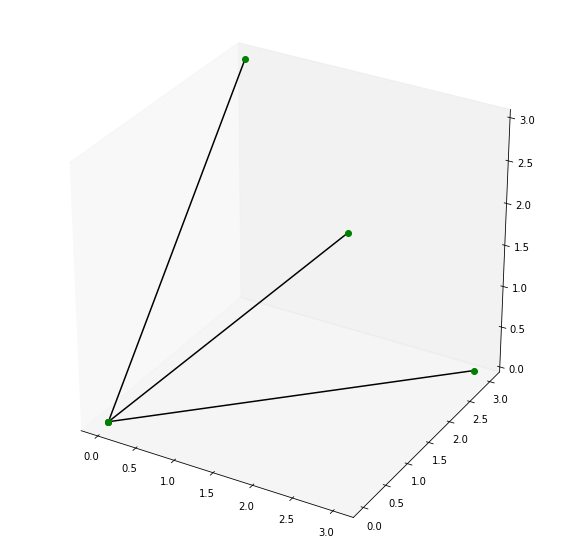

In [8]:
# vamos a graficar nuestra Red (r1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
r1.plot(ax)
plt.show()

# BASE ATÓMICA

In [9]:
#Definamos los vectores base, donde cada uno de los vectores apuntará a cada tipo de átomo,
#en este caso uno va al In y el otro al As

#Vectores base 

d1=np.array([0,0,0])
d2=np.array([a/4., a/4.,a/4.])

#Etiquetas de los átomos que tiene nuestro cristal 

In='In'
As='As'

#Definimos dos lista una con los elementos de la base y otra con las etiquetas de los átomos 

coordenada=[d1,d2]
elemento=[In, As]

In [10]:
class Base_Atomica(object):
    
    #Definimos nuestro inicializador
    
    def __init__(self,coordenada,elemento):
        
        #Definimos variables que se usarán en la clase
        
        self.co_1=coordenada[0]
        self.co_2=coordenada[1]
        self.el_1=elemento[0]
        self.el_2=elemento[1]
        
       # Escribiremos las propiedades de la clase
    
    def coordenada1(self):
        return self.co_1
    def coordenada2(self):
        return self.co_2
    def elemento1(self):
        return self.el_1
    def elemento2(self):
        return self.el_2
    
    # vamos a definir lo que nos permitirá gráficar 
    
    def plot(self):
      
        fig=plt.figure(figsize=(10,10))
        ax1=fig.add_subplot(111,projection='3d')
        ax1.scatter(np.array([self.co_1[0]]),np.array([self.co_1[1]]),np.array([self.co_1[2]]),marker='o',s=400)
        ax1.scatter(np.array([self.co_2[0]]),np.array([self.co_2[1]]),np.array([self.co_2[2]]),marker='o',s=400)

In [11]:
#Definamos la base atómica

Base=Base_Atomica(coordenada,elemento)

In [12]:
# Imprimimos los vectores base y las etiquetas de los átomos

print(Base.coordenada1())
print(Base.coordenada2())
print(Base.elemento1())
print(Base.elemento2())

[0 0 0]
[1.514575 1.514575 1.514575]
In
As


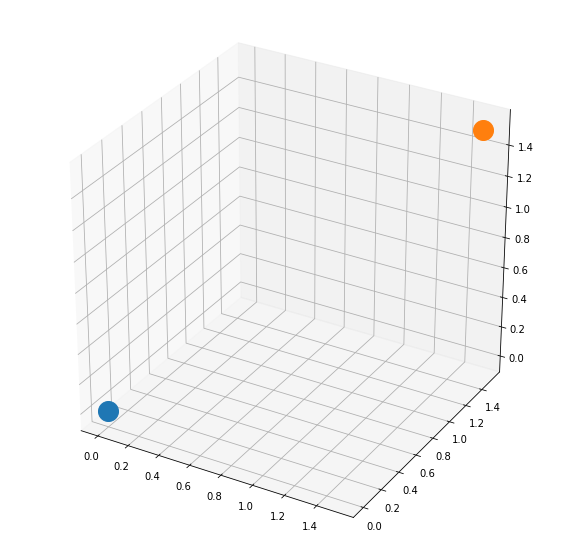

In [13]:
# Vamos a graficar la Base atómica

Base.plot()

# RED CRISTALINA

In [14]:
class Cristal(object):
    
    #Definimos nuestro inicializador, el cual utilizará información acerca de la Red y la Base creadas 
    #anteriormente, además se agrega el parámetro n , el cual se utilizará para saber cuantas veces queremos 
    #repetir la celda unitaria y con ello crear una supercelda.
    
    def __init__(self,Red,Base,n):
        

        
        #Definimos variables que se usaran en la clase para los diferentes tipos de átomos
        
        
        #Primer tipo de átomo (In)
        
        cristal1=[d1]
        self.cristal1=cristal1
         
        unitario1=[]
        self.unitario1=unitario1
        
        #Segundo tipo de átomo (As)
        
        cristal2=[d2]
        self.cristal2=cristal2
        
        unitario2=[]
        self.unitario2=unitario2
        
        #Determinaremos los primeros puntos de nuestro cristal utilizando los vectores de traslación
        #Para ello a cada vector de la base se le sumará i-veces los vectores de traslación y posterior
        #mente,dichas nuevas coordenadas se agregarán a una lista, de forma que se obtengan dos listas 
        #una para cada una de las fcc que conforman la estructura del InAs.
        
        for i in range(1,3):
            cristal1.append(Base.coordenada1()+i*a1)
            cristal1.append(Base.coordenada1()+i*a2)
            cristal1.append(Base.coordenada1()+i*a3)
            
            cristal2.append(Base.coordenada2()+i*a1)
            cristal2.append(Base.coordenada2()+i*a2)
            cristal2.append(Base.coordenada2()+i*a3)
       
        #Determinamos el tamaño de las listas 
        
        self.lenc1=len(self.cristal1)
        self.lenc2=len(self.cristal2)
        
        #Dado que con el procedimiento anterior no se obtuvieron todos los átomos que conforman las fcc
        #Agregaremos los átomos faltantes para amabas listas, utilizando los vectores que van sobre los
        #ejes cartesianos, agregando los nuevos puntos a las listas.
        
        
        for i in range(self.lenc1):
            cristal1.append(self.cristal1[i]+np.array([a,0.,0.]))
            cristal1.append(self.cristal1[i]+np.array([0.,a,0.]))
            cristal1.append(self.cristal1[i]+np.array([0.,0.,a]))

        self.lenc1=len(self.cristal1)
        
         
        for i in range(self.lenc2):
            cristal2.append(self.cristal2[i]+np.array([a,0.,0.]))
            cristal2.append(self.cristal2[i]+np.array([0.,a,0.]))
            cristal2.append(self.cristal2[i]+np.array([0.,0.,a]))

        self.lenc2=len(self.cristal2)
        
        #Con los dos procedimientos anteriores para determinar los puntos que conforman a nuestra estru-
        #ctura, se obtuvieron más átomos de los que conforman a la celda unitaria, y en vista de que nos 
        #interesa construir la celda unitaria, pondremos una condición sobre los átomos obtenidos para 
        #eliminar aquellos que no se encuentran en ella.        
        #Y a su vez se generarán dos listas, una para cada átomo ,de forma que la suma de los elementos 
        #de ambas listas sean los átomo de conforman la celda unitaria del InAs.   
        
        for i in range (self.lenc1):
            if self.cristal1[i][0] <=a and self.cristal1[i][1] <=a and self.cristal1[i][2] <=a:
                unitario1.append(self.cristal1[i])
                
                
        for i in range (self.lenc2):
            if self.cristal2[i][0] <=a and self.cristal2[i][1] <=a and self.cristal2[i][2] <=a:
                unitario2.append(self.cristal2[i])    
        
        unitario=unitario1+unitario2
        self.unitario=unitario
     
    
#SUPER CELDA

        #Para generar nuetra supercelda lo que haremos es a cada elemento de nuestra listas de celdas 
        #unitarias se les sumarán un elemento en la dirección del eje x, de ahí se generará otra lista 
        #y a elementos de esa lista se les sumará un elemento en la dirección del eje y, se volverá a 
        #generar otra lista, por último, a los elementos de esa lista se les sumará un elemento en di-
        #rección del eje z.
        #Y de esa forma habremos trasladado nuestras celdas unitarias en las tres direcciones posibles.

        scell1=[]
        self.scell1=scell1
        self.lenc1=len(self.unitario1)
        
        
        for i in range (self.lenc1):
            for j in range(1,n+1):
                scell1.append(self.unitario1[i]+j*np.array([a,0.,0.]))
        
        self.lenc1=len(self.scell1)
        
        for i in range(self.lenc1):
            for j in range(1,n+1):
                scell1.append(self.scell1[i]+j*np.array([0.,a,0.]))
        
        self.lenc1=len(self.scell1)
        
        for i in range(self.lenc1):
            for j in range(1,n+1):
                scell1.append(self.scell1[i]+j*np.array([0.,0.,a]))
                
                
        scell2=[]
        self.scell2=scell2
        self.lenc2=len(self.unitario2)     
                
              
        for i in range (self.lenc2):
            for j in range(1,n+1):
                scell2.append(self.unitario2[i]+j*np.array([a,0.,0.]))
        
        self.lenc2=len(self.scell2)
        
        for i in range(self.lenc2):
            for j in range(1,n+1):
                scell2.append(self.scell2[i]+j*np.array([0.,a,0.]))
        
        self.lenc2=len(self.scell2)
        
        for i in range(self.lenc2):
            for j in range(1,n+1):
                scell2.append(self.scell2[i]+j*np.array([0.,0.,a]))
                
  
    
        #Graficar la celda unitaria 
        
    def plot(self):
       
        fig=plt.figure(figsize=(10,10))
        ax1=fig.add_subplot(111,projection='3d')
        ax1.scatter([item[0] for item in self.unitario1],[item[1] for item in self.unitario1],[item[2] for item in self.unitario1],marker='o',s=200)
        ax1.scatter([item[0] for item in self.unitario2],[item[1] for item in self.unitario2],[item[2] for item in self.unitario2],marker='o',s=200)

        #Graficar la supercelda 
        
    def plotsce(self):
        
        fig=plt.figure(figsize=(10,10))
        ax1=fig.add_subplot(111,projection='3d')
        ax1.scatter([item[0] for item in self.scell1],[item[1] for item in self.scell1],[item[2] for item in self.scell1],marker='o',s=200)
        ax1.scatter([item[0] for item in self.scell2],[item[1] for item in self.scell2],[item[2] for item in self.scell2],marker='o',s=200)
        
        #Graficar el patrón de difracción de los Rayos X
        
 

In [15]:
#Definamos el cristal

Cristal=Cristal(r1,Base,1)

In [16]:
#Elementos que conforman la celda unitaria de InAs
Cristal.unitario

[array([0, 0, 0]),
 array([3.02915, 3.02915, 0.     ]),
 array([0.     , 3.02915, 3.02915]),
 array([3.02915, 0.     , 3.02915]),
 array([6.0583, 6.0583, 0.    ]),
 array([0.    , 6.0583, 6.0583]),
 array([6.0583, 0.    , 6.0583]),
 array([6.0583, 0.    , 0.    ]),
 array([0.    , 6.0583, 0.    ]),
 array([0.    , 0.    , 6.0583]),
 array([3.02915, 3.02915, 6.0583 ]),
 array([6.0583 , 3.02915, 3.02915]),
 array([3.02915, 6.0583 , 3.02915]),
 array([6.0583, 6.0583, 6.0583]),
 array([6.0583, 6.0583, 6.0583]),
 array([6.0583, 6.0583, 6.0583]),
 array([1.514575, 1.514575, 1.514575]),
 array([4.543725, 4.543725, 1.514575]),
 array([1.514575, 4.543725, 4.543725]),
 array([4.543725, 1.514575, 4.543725])]

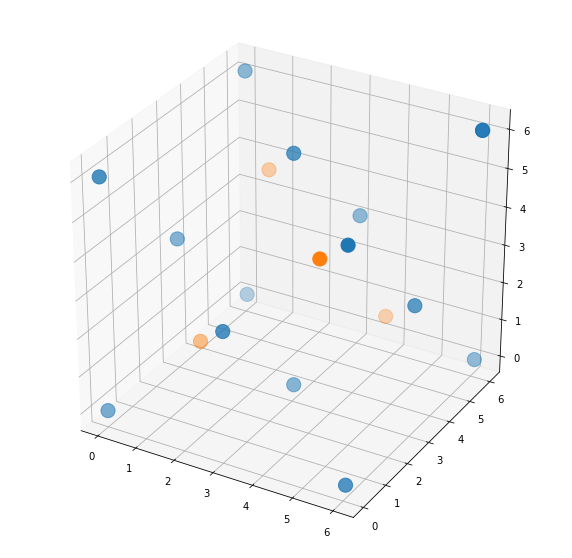

In [17]:
#Celda unitaria
Cristal.plot()

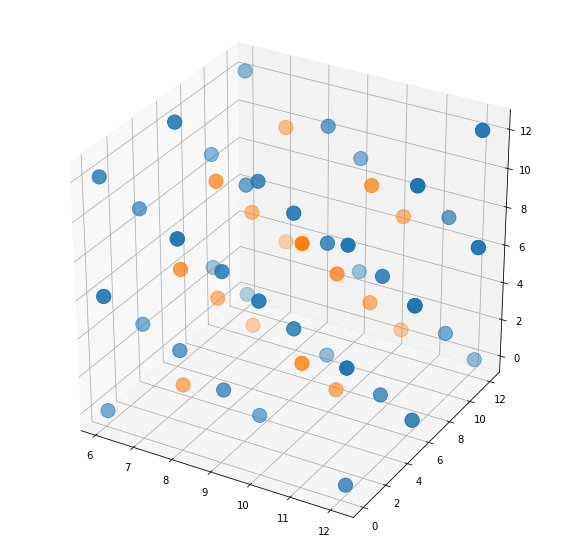

In [18]:
#Supercelda
Cristal.plotsce()